## This notebook compares the porter-duff-operator in the rgb- and lab-colorspace

In [1]:
from matplotlib import pyplot as plt
from numpy.random import randn
%matplotlib inline
import numpy as np
from skimage import color

from src import color_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper

In [2]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
size = 200

mu_x_1 = 0
mu_y_1 = 0
mu_variance_x_1 = 3
mu_variance_y_1 = 15
gaussian_1 = (mu_x_1,mu_variance_x_1,mu_y_1,mu_variance_y_1)
mu_x_2 = 3
mu_y_2 = 3
mu_variance_x_2 = 4
mu_variance_y_2 = 4
gaussian_2 = (mu_x_2,mu_variance_x_2,mu_y_2,mu_variance_y_2)
mu_x_3 = -2
mu_y_3 = -1
mu_variance_x_3 = 7
mu_variance_y_3 = 7
gaussian_3 = (mu_x_3,mu_variance_x_3,mu_y_3,mu_variance_y_3)

In [3]:
X, Y, Z = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_1,size)
X_1, Y_1, Z_1 = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_2,size)
X_2, Y_2, Z_2 = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_3,size)

In [4]:
Z_color, Z_alpha = picture_worker.get_colorgrid(Z,color_schemes.matplotlib_colorschemes,10,colorscheme="PuBu")
Z_color_1, Z_alpha_1 = picture_worker.get_colorgrid(Z_1,color_schemes.matplotlib_colorschemes,10,colorscheme="OrRd")
Z_color_2, Z_alpha_2 = picture_worker.get_colorgrid(Z_2,color_schemes.matplotlib_colorschemes,10,colorscheme="RdPu")

In [5]:
mixed_lab = picture_worker.combine_two_images(color_blending_operator.porter_duff_source_over, Z_color,Z_color_1,"lab",0.5)
mixed_lab = picture_worker.combine_two_images(color_blending_operator.porter_duff_source_over, mixed_lab,Z_color_2,"lab",0.5)

Lab-Color is used
Lab-Color is used


In [8]:
mixed_rgb = picture_worker.combine_two_images(color_blending_operator.porter_duff_source_over, Z_color,Z_color_1,alpha=0.5)
mixed_rgb = picture_worker.combine_two_images(color_blending_operator.porter_duff_source_over, mixed_rgb,Z_color_2,alpha=0.5)

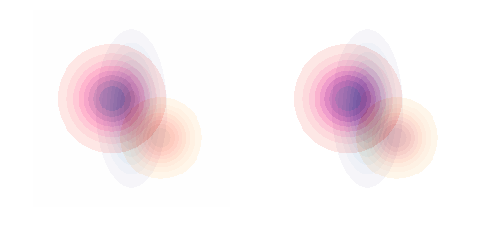

In [9]:
#displays an image
fig, (ax_0, ax_1) = plt.subplots(1,2)
ax_0.imshow(mixed_lab)
ax_0.axis("off")
ax_1.imshow(mixed_rgb)
ax_1.axis("off")
plt.subplots_adjust(0, 0, 1, 1)
#plt.axis("off")
plt.show()

In [10]:
Z_color[1][1]

array([1., 1., 1.])

In [22]:
mixed_rgb_mult = picture_worker.combine_two_images(color_blending_operator.simple_color_mult, Z_color,Z_color_1)
#mixed_rgb_mult = picture_worker.combine_two_images(color_blending_operator.simple_color_mult, mixed_rgb,Z_color_2)

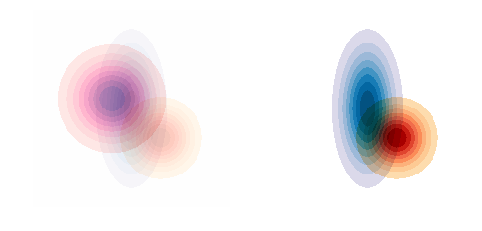

In [23]:
#displays an image
fig, (ax_0, ax_1) = plt.subplots(1,2)
ax_0.imshow(mixed)
ax_0.axis("off")
ax_1.imshow(mixed_rgb_mult)
ax_1.axis("off")
plt.subplots_adjust(0, 0, 1, 1)
#plt.axis("off")
plt.show()

In [13]:
mixed_rgb_sect = picture_worker.combine_two_image_sections(color_blending_operator.porter_duff_source_over, Z_color,Z_color_1,alpha=0.5)
mixed_rgb_sect = picture_worker.combine_two_image_sections(color_blending_operator.porter_duff_source_over, mixed_rgb,Z_color_2,alpha=0.5)

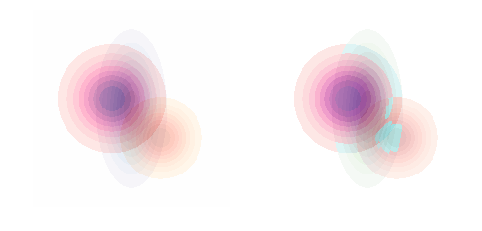

In [14]:
#displays an image
fig, (ax_0, ax_1) = plt.subplots(1,2)
ax_0.imshow(mixed)
ax_0.axis("off")
ax_1.imshow(mixed_rgb_sect)
ax_1.axis("off")
plt.subplots_adjust(0, 0, 1, 1)
#plt.axis("off")
plt.show()

In [15]:
mixed_max,z_new = picture_worker.combine_two_image_max(Z_color,Z,Z_color_1,Z_1)
mixed_max, _ = picture_worker.combine_two_image_max(mixed_max,z_new,Z_color_2,Z_2)

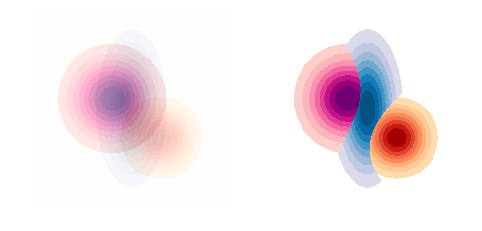

In [16]:
#displays an image
fig, (ax_0, ax_1) = plt.subplots(1,2)
ax_0.imshow(mixed)
ax_0.axis("off")
ax_1.imshow(mixed_max)
ax_1.axis("off")
plt.subplots_adjust(0, 0, 1, 1)
#plt.axis("off")
plt.show()

In [17]:
Z_color_hsv = color.rgb2hsv(Z_color_2)

In [18]:
Z_color_hsv[1][1]

array([0., 0., 1.])

In [19]:
Z_color[1][1]

array([1., 1., 1.])

In [20]:
Z_color_1[1][1]

array([1., 1., 1.])

In [21]:
Z_color_2[1][1]

array([1., 1., 1.])